In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
page1 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating")
page2 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt")
page3 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt")
page4 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt")
page5 = requests.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt")
pages = [page1, page2, page3, page4, page5]

In [4]:
headers = ['Titre', 'Année', 'Score', 'Réalisateur', 'Votes', 'Recette']
df = pd.DataFrame(columns=headers)

for page in pages:
    soup = BeautifulSoup(page.content, 'html.parser')
    films = soup.find_all("div", {"class":"lister-item-content"})
    for film in films:
        row = []
        title = film.h3.a.text
        row.append(title)
        year = film.h3.find("span", {"class":"lister-item-year text-muted unbold"}).text.strip('I ()')
        row.append(year)
        rate = film.find("div", {"class":"ratings-imdb-rating"}).strong.text
        row.append(rate)
        director = film.find_all('p')[2].a.text
        row.append(director)
        for i in range(5):
            if i % 5 == 1:
                vote = film.find("p", {"class":"sort-num_votes-visible"}).find_all("span")[1]["data-value"]
                row.append(vote)
            elif i % 5 == 4:
                if len(film.find("p", {"class":"sort-num_votes-visible"}).find_all("span")) < 4:
                    row.append("0")
                else:
                    gross = film.find("p", {"class":"sort-num_votes-visible"}).find_all("span")[4]["data-value"]
                    row.append(gross)
            else:
                pass
        length = len(df)
        df.loc[length] = row

In [5]:
df

,Titre,Année,Score,Réalisateur,Votes,Recette
0,Les Évadés,1994,9.3,Frank Darabont,2384368,"28,341,469"
1,Le parrain,1972,9.2,Francis Ford Coppola,1652467,"134,966,411"
2,The Dark Knight : Le Chevalier noir,2008,9.0,Christopher Nolan,2347840,"534,858,444"
3,"Le parrain, 2ème partie",1974,9.0,Francis Ford Coppola,1149824,"57,300,000"
4,12 Hommes en colère,1957,9.0,Sidney Lumet,703994,"4,360,000"
...,...,...,...,...,...,...
245,Mr. Smith au sénat,1939,8.1,Frank Capra,108449,"9,600,000"
246,Autant en emporte le vent,1939,8.1,Victor Fleming,293966,"198,676,459"
247,New York - Miami,1934,8.1,Frank Capra,95742,"4,360,000"
248,La passion de Jeanne d'Arc,1928,8.1,Carl Theodor Dreyer,48977,"21,877"


In [40]:
df.Titre = df.Titre.astype(str).astype(str)
df.Année = df.Année.astype(str).astype(int)
df.Score = df.Score.astype(str).astype(float)
df.Réalisateur = df.Réalisateur.astype(str).astype(str)
df.Votes = df.Votes.astype(str).astype(int)
df.Recette = df.Recette.astype(str)


In [73]:
df.isnull().sum(axis=0)

Titre          0
Année          0
Score          0
Réalisateur    0
Votes          0
Recette        0
dtype: int64

In [44]:
df.Recette = df.Recette.apply(lambda x: x.replace(",", ""))
df.Recette = df.Recette.astype(str).astype(int)


In [52]:
df_sort_by_recette = df.sort_values('Recette', ascending=False)


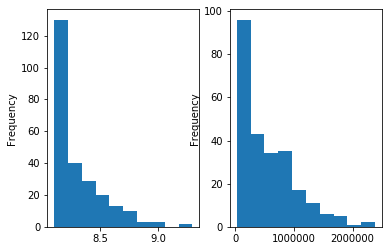

In [62]:
fig, ax =plt.subplots(1,2)

df.Score.plot(kind='hist', bins=10, ax=ax[0])
df.Votes.plot(kind='hist', bins=10, ax=ax[1]);

In [47]:
mean_score = movie.Score.mean()
mean_recette = movie.Recette.mean()

mean_recette


75052849.928

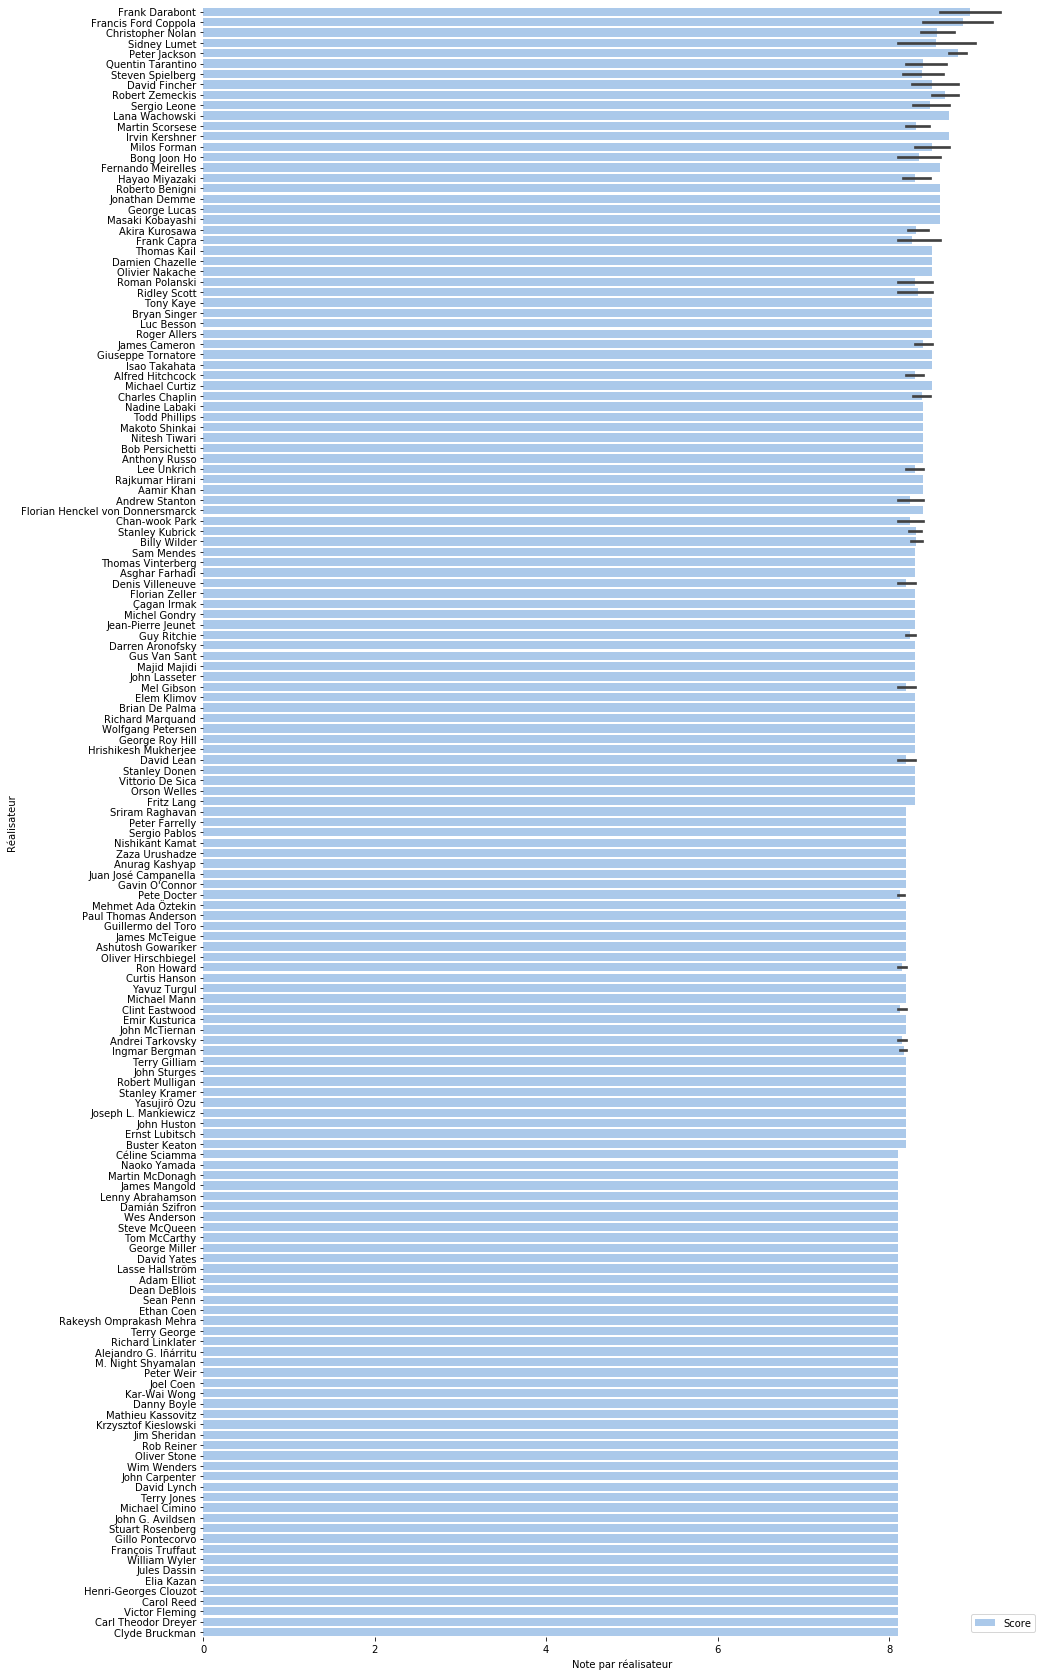

In [21]:
f, ax = plt.subplots(figsize=(15, 30))
crashes = df.sort_values("Score", ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x="Score", y="Réalisateur", data=df, label="Score", color="b")ax.legend(ncol=2, loc="lower right")
ax.set(xlabel="Note par réalisateur")
sns.despine(left=True, bottom=True)


In [69]:
movie[['Réalisateur', 'Score']].groupby('Score').count()

,Réalisateur
Score,
8.1,77
8.2,53
8.3,40
8.4,29
8.5,20
8.6,13
8.7,5
8.8,5
8.9,3


Text(0, 0.5, 'score Count')

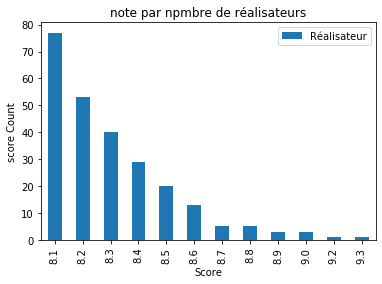

In [71]:
movie[['Réalisateur', 'Score']].groupby('Score').count().plot(kind='bar', title='note par npmbre de réalisateurs')
plt.xlabel('Score')
plt.ylabel('score Count')

Titre          0
Année          0
Score          0
Réalisateur    0
Votes          0
Recette        0
dtype: int64